# Visão Computacional - Reconhecimento Facial com Haar Cascade(Viola & Jones)

OBJETIVO:

- Realizar práticas de visão computacional com o algoritmo Haar Cascade da biblioteca OpenCV. Mais especificamente, neste projeto busco aplicar o algoritmo em um problema de classificação de imagens, realizando o reconhecimento preciso de diferentes elementos contidos em imagens distintas. Para isso, utilizarei modelos já treinados e disponibilizados em um repositório Github(endereço abaixo) e os testes serão realizados em imagens 'limpas' e imagens distorcidas com ruídos adicionados. 
- No repositório https://github.com/opencv/opencv/tree/master/data/haarcascades constam diversos algoritmos já treinados especificamente para reconhecimento facial, de olhos, óculos, sorrisos etc.

DADOS SOBRE O ALGORITMO:
- O modelo Haar Cascade reconhe imagens pela detecção de áreas em que os pixels estão mais ativos e mais inativos. Por meio de Edge Features varre e reconhece 2 lados verticais e horizontais de uma imagem; via Line Features isola a área de pixels central, varre e reconhece os lados que não fazem parte desta imagem; por meio de Four-Rectangle Features reconhece a imagem como um 'quadrado' fazendo a varredura do conjunto em 4 partes. Executa-se estes filtros em diferentes áreas da imagem e assim obtemos a pontuação de cada um deles a partir dos cálculos do algoritmo: com estes scores o algoritmo informa a probabilidade de ser ter um rosto na imagem. 

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [62]:
imagem = cv2.imread('C:/Users/sylvi/Programacao/DS/people1.jpg')

In [63]:
#Visualizando imagem normal:
cv2.imshow('Figura', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

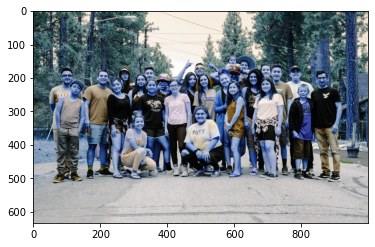

In [64]:
#Visualizando imagem em escala de cinza:
plt.imshow(imagem)
plt.show()

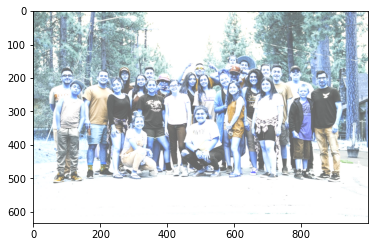

In [65]:
#Criando imagens com ruídos:
matriz = np.ones(imagem.shape, dtype='uint8') * 100
imagemRuido1 = cv2.add(imagem, matriz)  
plt.imshow(imagemRuido1)
plt.show()

In [75]:
imagemRuido2 = cv2.GaussianBlur(imagem, (7,7), 2) #Kernel 7x7, std=3.

cv2.imshow("Imagem com ruído Gaussiano", imagemRuido2)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [76]:
#Instanciando algoritmo Classificador:
classificadorRosto = cv2.CascadeClassifier('C:/Users/sylvi/Programacao/DS/Haar Cascade/haarcascade_frontalface_alt.xml')

In [77]:
#Criando o retângulo para os rostos:
retanguloRostos = classificadorRosto.detectMultiScale(imagem, scaleFactor= 1.1, minNeighbors=4)

#Scale Factor:para resolver o problema de diferentes tamanhos de rostos na imagem, cria uma pirâmide de imagens e aplica um zoom
#em cada uma delas. No scale factor apenas informamos o valor de cada zoom até o ponto máximo: scale factor 1.1 = zoom de 10%.

#minNeighbors: no retângulo que contém o rosto detectado em uma imagem, há várias partes da face que serão varridas. São uma 
#espécie de retângulos vizinhos que reforçam a identificação de um rosto, considerando os seus elementos.
#Gealmente se informa entre 3 e 6 'vizinhos' para a detecção de um rosto e quanto maior este valor, mais detecções se terá, mas
#mais garantido será a detecção de que se trata mesmo de uma face. Ao mesmo tempo, um número muito grande de vizinhos pode
#levar a um erro de detecção excessiva (como o algoritmo KNN) em que se detecta elementos fora do espectro desejado.

In [78]:
#Aplicando o retângulo para rostos em nossa imagem:
for (x,y, largura, altura) in retanguloRostos:
    imagem = cv2.rectangle(imagem, (x,y), (x+largura, y+altura), (255, 0, 0), 4) #red, 4=espessura do retângulo
    imagemRuido1 = cv2.rectangle(imagemRuido1, (x,y), (x+largura, y+altura), (255, 0, 0), 4)   
    imagemRuido2 = cv2.rectangle(imagemRuido2, (x,y), (x+largura, y+altura), (255, 0, 0), 4)   

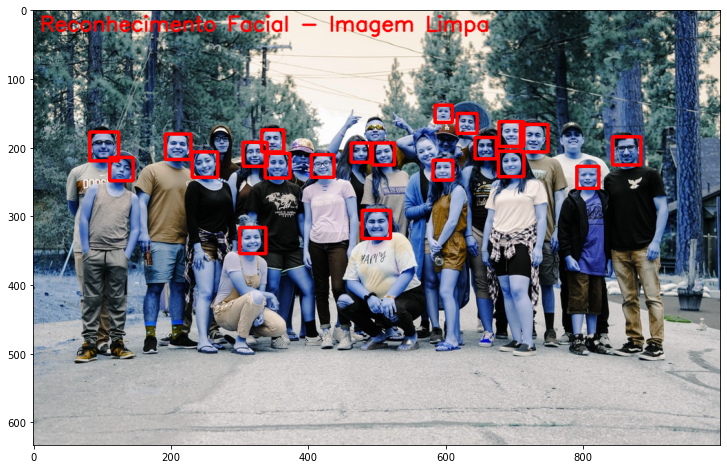

In [79]:
#Plotando todas as imagem com os retângulos de detecção de faces.
fonte = cv2.FONT_HERSHEY_SIMPLEX   
linha = cv2.LINE_AA   
cv2.putText(imagem, 'Reconhecimento Facial - Imagem Limpa', (10, 30), fonte, 1, (255,0,0), 2, linha)

plt.figure(figsize=(16,8))
plt.imshow(imagem)
plt.show()

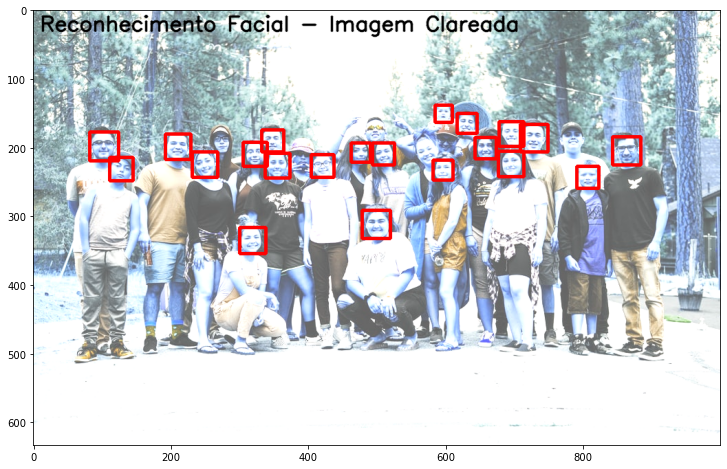

In [80]:
fonte = cv2.FONT_HERSHEY_SIMPLEX   
linha = cv2.LINE_AA   
cv2.putText(imagemRuido1, 'Reconhecimento Facial - Imagem Clareada', (10, 30), fonte, 1, (0,0,0), 2, linha)

plt.figure(figsize=(16,8))
plt.imshow(imagemRuido1)
plt.show()

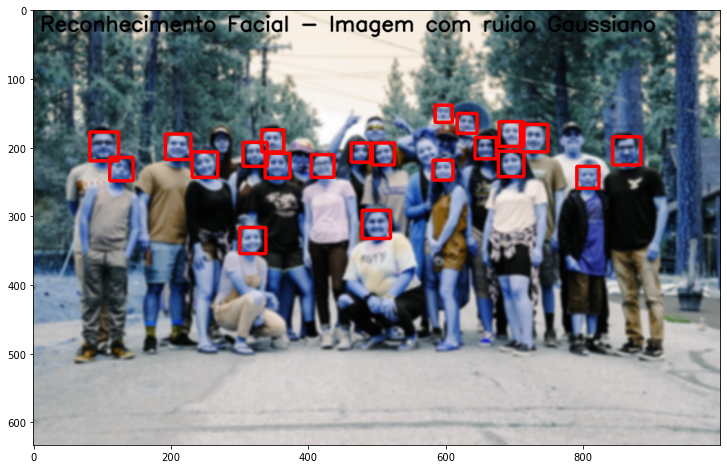

In [81]:
fonte = cv2.FONT_HERSHEY_SIMPLEX   
linha = cv2.LINE_AA   
cv2.putText(imagemRuido2, 'Reconhecimento Facial - Imagem com ruido Gaussiano', (10, 30), fonte, 1, (0,0,0), 2, linha)

plt.figure(figsize=(16,8))
plt.imshow(imagemRuido2)
plt.show()

<b>RECONHECIMENTO FACIADE ÓCULOS E OLHOS COM HAAR CASCADE

In [97]:
novaImagem = cv2.imread('C:/Users/sylvi/Programacao/DS/people2.jpg')
cv2.imshow("Nova Figura", novaImagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

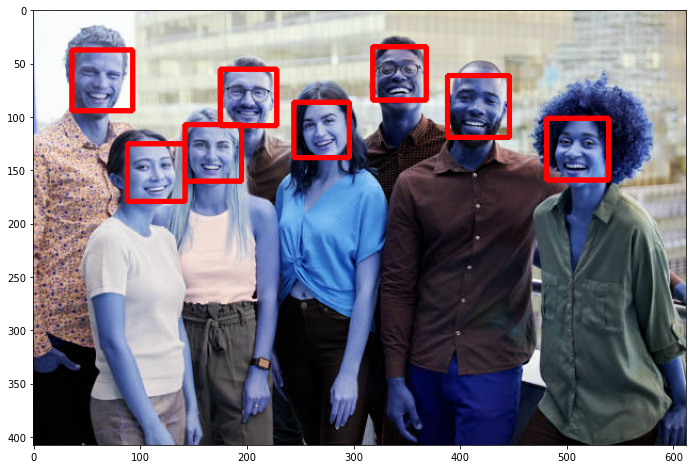

In [98]:
#Classificador:
classificadorRosto = cv2.CascadeClassifier('C:/Users/sylvi/Programacao/DS/Haar Cascade/haarcascade_frontalface_alt.xml')

#Criar retângulo:
retanguloRostos = classificadorRosto.detectMultiScale(novaImagem, scaleFactor= 1.1, minNeighbors=1)

#Aplicar retângulo na imagem:
for (x,y, largura, altura) in retanguloRostos:
    novaImagem = cv2.rectangle(novaImagem, (x,y), (x+largura, y+altura), (255, 0, 0), 4) #red, 4=espessura do retângulo
 
 #Mostrar imagem com detecções:
plt.figure(figsize=(16,8))
plt.imshow(novaImagem)
plt.show()